In [211]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [212]:
#tf.config.experimental.set_visible_devices([], 'GPU')

In [213]:
data = pd.read_json('archive/Sarcasm_Headlines_Dataset.json', lines = True)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [215]:
x = data['headline']
y = data['is_sarcastic']

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences, 100)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, 100)

model = tf.keras.models.Sequential()
model.add(Embedding(100000, 12, input_length=100))
model.add(LSTM(128))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [217]:
history_data = model.fit(training_padded, y_train, 
                         batch_size = 512, epochs = 10, 
                         validation_data = (testing_padded, y_test))

Epoch 1/10
47/47 [==============================] - 2s 29ms/step - loss: 0.7136 - accuracy: 0.5578 - val_loss: 1.6398 - val_accuracy: 0.5743
Epoch 2/10
47/47 [==============================] - 1s 23ms/step - loss: 0.9344 - accuracy: 0.5129 - val_loss: 0.6228 - val_accuracy: 0.4279
Epoch 3/10
47/47 [==============================] - 1s 23ms/step - loss: 0.5648 - accuracy: 0.7514 - val_loss: 0.5486 - val_accuracy: 0.8353
Epoch 4/10
47/47 [==============================] - 1s 24ms/step - loss: 0.4640 - accuracy: 0.9086 - val_loss: 0.5688 - val_accuracy: 0.8098
Epoch 5/10
47/47 [==============================] - 1s 23ms/step - loss: 0.4086 - accuracy: 0.9161 - val_loss: 0.4496 - val_accuracy: 0.7930
Epoch 6/10
47/47 [==============================] - 1s 23ms/step - loss: 0.4056 - accuracy: 0.8602 - val_loss: 0.4622 - val_accuracy: 0.8061
Epoch 7/10
47/47 [==============================] - 1s 24ms/step - loss: 0.3204 - accuracy: 0.9126 - val_loss: 0.3835 - val_accuracy: 0.8383
Epoch 8/10
47

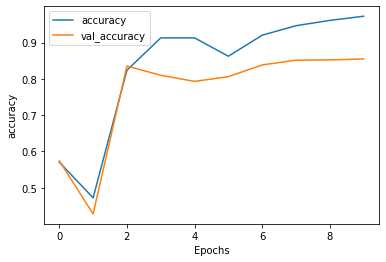

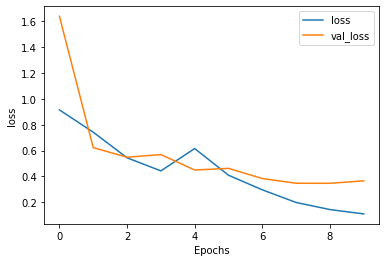

In [218]:
import matplotlib.pyplot as plt
def plot_data(history, string):
  plt.plot(history_data.history[string])
  plt.plot(history_data.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_data(history_data, "accuracy")
plot_data(history_data, "loss")

In [219]:
results = model.evaluate(testing_padded, y_test)
results

84/84 [==============================] - 0s 4ms/step - loss: 0.3658 - accuracy: 0.8547


[0.3658365309238434, 0.8547360301017761]